In [1]:
%matplotlib inline


# tSNE to visualize digits


Here we use :class:`sklearn.manifold.TSNE` to visualize the digits
datasets. Indeed, the digits are vectors in a 8*8 = 64 dimensional space.
We want to project them in 2D for visualization. tSNE is often a good
solution, as it groups and separates data points based on their local
relationship.




Load the iris data



In [2]:
from datasets.mnist import get_mnist
from visual import get_dataset_features
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import time

In [3]:
mnist_dataloader = get_mnist(True, batch_size=1024)
m_img, m_label = get_dataset_features(mnist_dataloader, 2)
m_img, m_label = m_img.numpy(), m_label.numpy()

In [4]:
print(m_img.shape)
print(m_label.shape)

(2048, 1024)
(2048,)


In [6]:
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

In [7]:
print(X.shape)

(500, 64)


Fit and transform with a TSNE



In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

Project the data in 2D



In [7]:
m_2d = tsne.fit_transform(m_img)

In [16]:
X_2d = tsne.fit_transform(X)

In [8]:
#print(X_2d.shape)
print(m_2d.shape)

(2048, 2)


Visualize the data



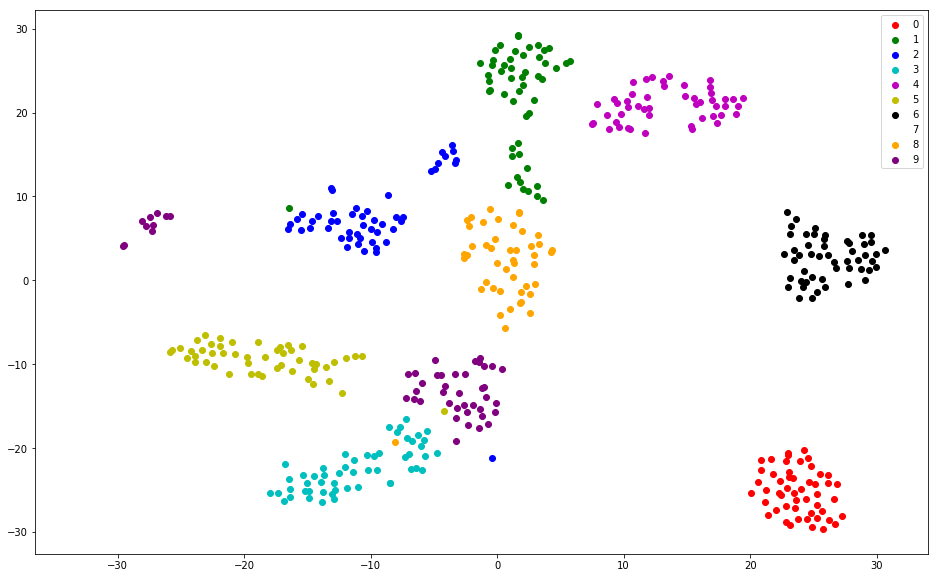

In [32]:
target_ids = range(len(digits.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(16, 10))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(m_2d[y == i, 0], m_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

In [9]:
res = pd.DataFrame()
res['d1'] = m_2d[:, 0]
res['d2'] = m_2d[:, 1]
res['label'] = m_label

In [12]:
def get_tsne(features, labels):
    tsne = TSNE(n_components=2,
                verbose=1,
                random_state=0)
    time_start = time.time()
    result = tsne.fit_transform(features)
    print('time elapsed: {} seconds'.format(time.time() - time_start))

    df_result = pd.DataFrame()
    df_result['d1'] = result[:, 0]
    df_result['d2'] = result[:, 1]
    df_result['label'] = labels

    return df_result

In [13]:
result = get_tsne(m_img, m_label)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2048 samples in 0.204s...
[t-SNE] Computed neighbors for 2048 samples in 11.379s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2048
[t-SNE] Computed conditional probabilities for sample 2000 / 2048
[t-SNE] Computed conditional probabilities for sample 2048 / 2048
[t-SNE] Mean sigma: 7.396493
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.097893
[t-SNE] KL divergence after 1000 iterations: 1.251363
time elapsed: 36.010700702667236 seconds


In [14]:
print(result.keys())

Index(['d1', 'd2', 'label'], dtype='object')


In [31]:
import numpy as np
X = np.load('cache/tmp/data/dat_src.npy')
y = np.load('cache/tmp/data/label_src.npy')
loaded_res = get_tsne(m_img, m_label)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2048 samples in 0.222s...
[t-SNE] Computed neighbors for 2048 samples in 13.514s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2048
[t-SNE] Computed conditional probabilities for sample 2000 / 2048
[t-SNE] Computed conditional probabilities for sample 2048 / 2048
[t-SNE] Mean sigma: 7.396493
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.097893
[t-SNE] KL divergence after 1000 iterations: 1.251363
time elapsed: 38.21809101104736 seconds


In [35]:
real_load = get_tsne(X, y)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2048 samples in 0.013s...
[t-SNE] Computed neighbors for 2048 samples in 1.048s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2048
[t-SNE] Computed conditional probabilities for sample 2000 / 2048
[t-SNE] Computed conditional probabilities for sample 2048 / 2048
[t-SNE] Mean sigma: 2.797911
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.728760
[t-SNE] KL divergence after 1000 iterations: 1.813612
time elapsed: 26.20194387435913 seconds


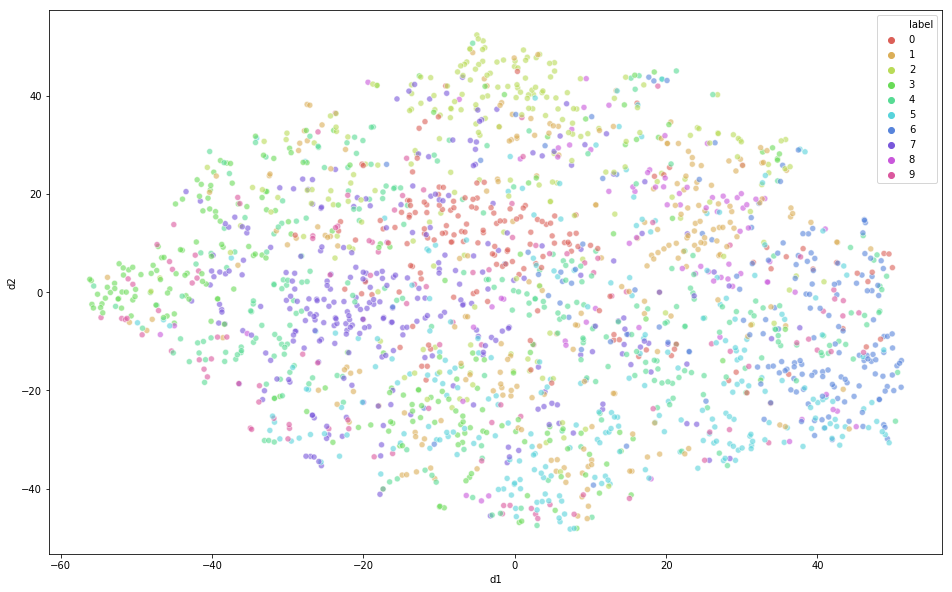

In [36]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="d1", y="d2",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=real_load,
    legend='full',
    alpha=0.6
)
plt.show()

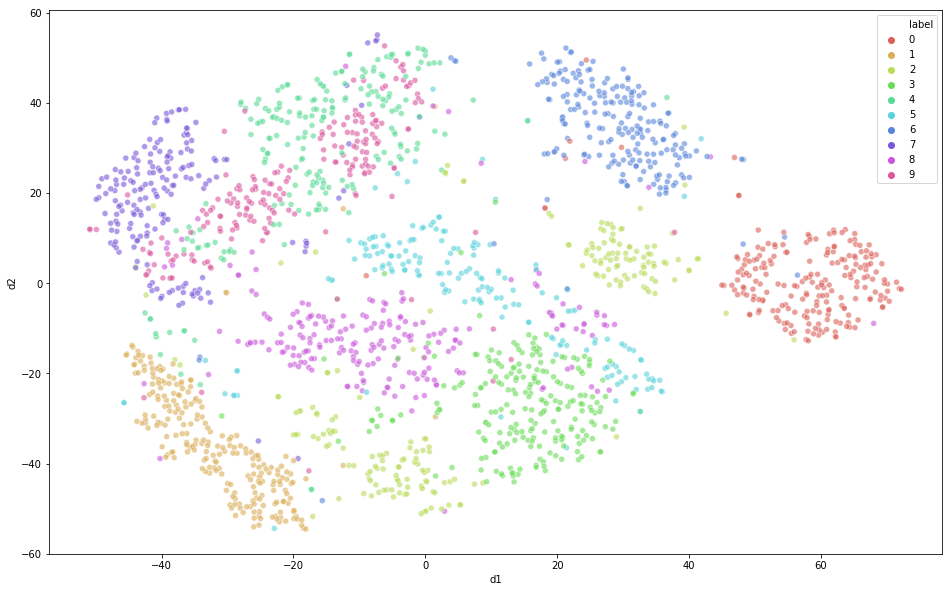

In [20]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="d1", y="d2",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=result,
    legend='full',
    alpha=0.6
)
plt.show()